## KNN Classification

### Import Libraries 

In [1]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data and check out the columns
data = pd.read_csv('medical_clean.csv')
data.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

### Create a new dataset

In [3]:
# Create a new dataset with the features to predict with
df = data[['ReAdmis','Initial_days','Age','VitD_levels','TotalCharge',
          'Additional_charges','Gender','Initial_admin','Services', 'Complication_risk','HighBlood','Stroke',
           'Overweight','Diabetes','Asthma']]

In [4]:
# create a copy of the dataset to work on
df = df.copy()

### Check for duplicates, null values and data types

In [5]:
# Check for duplicates
sum(df.duplicated())

0

In [6]:
# Check for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ReAdmis             10000 non-null  object 
 1   Initial_days        10000 non-null  float64
 2   Age                 10000 non-null  int64  
 3   VitD_levels         10000 non-null  float64
 4   TotalCharge         10000 non-null  float64
 5   Additional_charges  10000 non-null  float64
 6   Gender              10000 non-null  object 
 7   Initial_admin       10000 non-null  object 
 8   Services            10000 non-null  object 
 9   Complication_risk   10000 non-null  object 
 10  HighBlood           10000 non-null  object 
 11  Stroke              10000 non-null  object 
 12  Overweight          10000 non-null  object 
 13  Diabetes            10000 non-null  object 
 14  Asthma              10000 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 1.1+

In [7]:
df.nunique()

ReAdmis                  2
Initial_days          9997
Age                     72
VitD_levels           9976
TotalCharge           9997
Additional_charges    9418
Gender                   3
Initial_admin            3
Services                 4
Complication_risk        3
HighBlood                2
Stroke                   2
Overweight               2
Diabetes                 2
Asthma                   2
dtype: int64

### Outlier detection

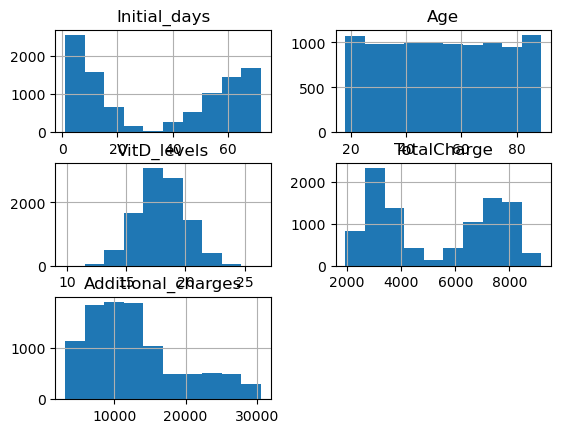

In [8]:
# Check for distribution and outliers
df.hist();

### Summary statistics

In [9]:
# Summary statistics of features
df.describe()

,Initial_days,Age,VitD_levels,TotalCharge,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.455299,53.511700,17.964262,5312.172769,12934.528587
std,26.309341,20.638538,2.017231,2180.393838,6542.601544
min,1.001981,18.000000,9.806483,1938.312067,3125.703000
25%,7.896215,36.000000,16.626439,3179.374015,7986.487755
50%,35.836244,53.000000,17.951122,5213.952000,11573.977735
75%,61.161020,71.000000,19.347963,7459.699750,15626.490000
max,71.981490,89.000000,26.394449,9180.728000,30566.070000


### Visual evalutaion

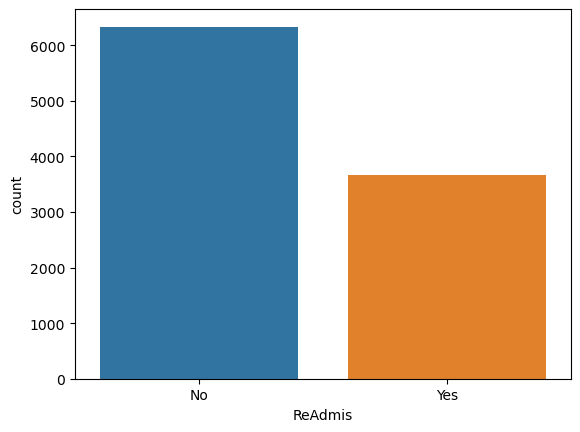

In [10]:
# Visually evaluate the total distribution of the classes for readmission
sns.countplot(x=df.ReAdmis);

In [ ]:
df.columns

### P-values and contingency table

In [11]:
# Evaluating p-values of the chosen variables
var_cols = ['ReAdmis', 'Initial_days', 'Age', 'VitD_levels', 'TotalCharge',
       'Additional_charges', 'Gender', 'Initial_admin', 'Services',
       'Complication_risk', 'HighBlood', 'Stroke', 'Overweight', 'Diabetes',
       'Asthma']
for cols in var_cols:
    ct = pd.crosstab(df['ReAdmis'], df[cols])
    print(f" {cols} p-value:",chi2_contingency(ct)[1])

 ReAdmis p-value: 0.0
 Initial_days p-value: 0.48683689071721553
 Age p-value: 0.18551330450513348
 VitD_levels p-value: 0.5065427582250107
 TotalCharge p-value: 0.48683689071721553
 Additional_charges p-value: 0.005178117979576193
 Gender p-value: 0.4525370014241822
 Initial_admin p-value: 0.14298951184306222
 Services p-value: 0.03075281113212747
 Complication_risk p-value: 0.923567890607327
 HighBlood p-value: 0.8368656684578771
 Stroke p-value: 0.9474770077616069
 Overweight p-value: 0.4032948387365497
 Diabetes p-value: 0.7775238586920562
 Asthma p-value: 0.090951450679407


### Re-expression of categorical variables

In [12]:
# Dummy encoding categorical features
df = pd.get_dummies(df, columns=['Gender','Initial_admin','Services', 'Complication_risk'])

In [13]:
# Lable encoding categorical features
categorical = ['ReAdmis','HighBlood','Stroke','Overweight','Diabetes','Asthma']
cat_dict = {'Yes':1,'No':0} 
for cat in categorical:
    df[cat] = df[cat].replace(cat_dict)

In [14]:
df.sample(3)

,ReAdmis,Initial_days,Age,VitD_levels,TotalCharge,Additional_charges,HighBlood,Stroke,Overweight,Diabetes,...,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium
9284,1,63.166250,27,18.562810,7712.909000,5174.54000,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
4367,0,1.324426,67,18.366589,2256.634146,21900.27451,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
6817,1,69.196010,64,18.409380,8295.831000,21397.12000,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1


### Heat map and correlation

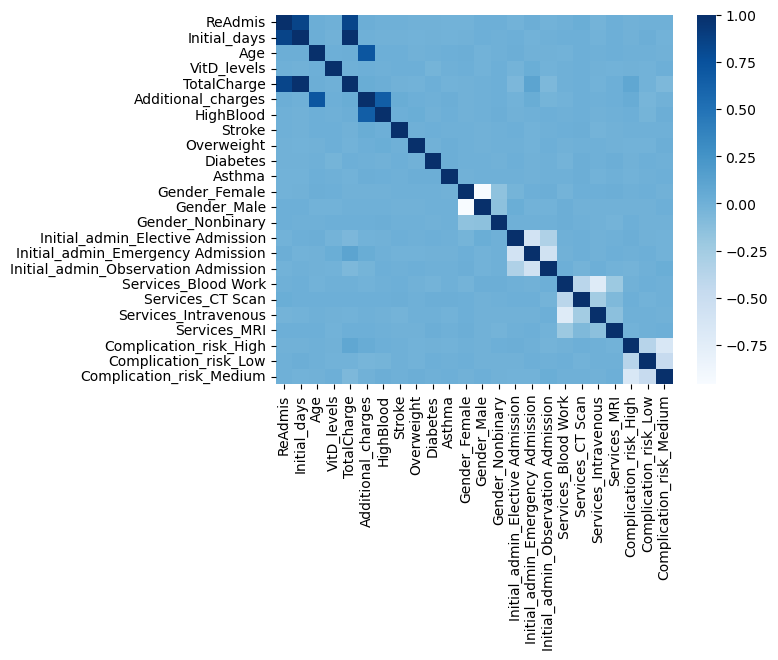

In [15]:
# Create a heat map to see feature correlation
corr = df.corr()
sns.heatmap(corr, cmap='Blues');

In [16]:
# Rename some of the features for readability
df.rename(columns={'Initial_admin_Emergency Admission':'Emergency_admission', 
                   'Initial_admin_Elective Admission':'Elective_admission',
                   'Initial_admin_Observation Admission':'Observation_admission',
                   'Services_Blood Work':'Blood_work','Services_CT Scan':'CT_scan','Services_MRI':'MRI',
                   'Services_Intravenous':'Intravenous'}, inplace=True)

In [17]:
# Save cleaned data to excel
df.to_excel('D209-Task1_cleaned_data.xlsx')

## ANALYSIS

In [18]:
# Seperate target variable and predictors
X = df.drop('ReAdmis',axis=1)
y = df['ReAdmis']

In [19]:
# Select 5 best features and print the selected feature names
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

skbest = SelectKBest(score_func=f_classif, k=5)
X_new = skbest.fit_transform(X,y)
print(X_new.shape)

features = X.columns[(skbest.get_support())]
features

(10000, 5)


Index(['Initial_days', 'TotalCharge', 'Emergency_admission', 'CT_scan',
       'Intravenous'],
      dtype='object')

In [20]:
# Create a new X dataset with the selected 5 features
X_new = X[['Initial_days', 'TotalCharge', 'Emergency_admission', 'CT_scan', 'Intravenous']]

In [21]:
# Save new dataset to excel
X_new.to_excel('X_new.xlsx')

In [22]:
# Create train and test data stratify readmission data so it is evenly ditributed to test and train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.25, random_state=42, stratify=y)

- Scale the data to reduce bias of variables with higher values

In [23]:
# Scale train and test data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# Check to see if admitted ratio is the same for training and test

print(y_train.value_counts())
print(y_test.value_counts())
print('Training admitted ratio:', sum(y_train==1)/len(y_train))
print('Test admitted ratio:', sum(y_test==1)/len(y_test))

In [24]:
# Create dataframe for train and test data

train_data = pd.DataFrame(X_train, y_train, columns=X_new.columns)
test_data = pd.DataFrame(X_test, y_test, columns=X_new.columns)
train_data.shape, test_data.shape

((7500, 5), (2500, 5))

In [25]:
# Save train and test data to excel

train_data.to_excel('PA_train_data.xlsx')
test_data.to_excel('PA_test_data.xlsx')

In [26]:
train_data.sample()

,Initial_days,TotalCharge,Emergency_admission,CT_scan,Intravenous
ReAdmis,,,,,
1,0.882274,1.01504,0.983601,2.68937,-0.680536


In [27]:
test_data.sample()

,Initial_days,TotalCharge,Emergency_admission,CT_scan,Intravenous
ReAdmis,,,,,
1,0.959566,0.95741,1.001601,2.638519,-0.658397


In [28]:
from sklearn.neighbors import KNeighborsClassifier
k = 2
knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn)

KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')


In [29]:
# Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))

[[1545   38]
 [  29  888]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1583
           1       0.96      0.97      0.96       917

    accuracy                           0.97      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.97      0.97      0.97      2500



In [30]:
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# # Accuracy is the proportion of the correct predictions
accuracy = (TN + TP)/(TN + TP +FN + FP)
print('Accuracy score is: ',accuracy)

# # Precision measures the accuracy of a positive outcome
precision = TP/(TP + FP)
print('Precision score is: ',precision)

# # Recall or Sensitiviy measures model's strength to predict positive outcome 
recall = TP/(TP + FN)
print('Recall score is: ',recall)

## Specificity measures a mode's ability to predict a negative outcome
specificity = TN/(TN + FP)
print('Specificity score is: ', specificity)


Accuracy score is:  0.9732
Precision score is:  0.958963282937365
Recall score is:  0.9683751363140676
Specificity score is:  0.9759949463044851


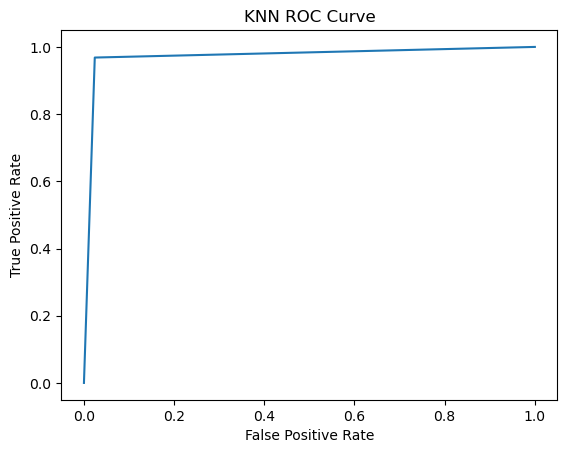

In [31]:
# ROC Curve
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred) # from model3.predict(x)
# roc_df = pd.DataFrame({'recall':false_positive_rate, 'specificity':true_positive_rate})
plt.plot(false_positive_rate, true_positive_rate, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve');

In [32]:
# AUC perfect classfier will have an AUC of 1, a random classifier will have an AUC of 0.5.

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print('AUC: ',auc)

AUC:  0.9721850413092764


## Best Parameter and Grid Search

Minimum error:- 0.0152 at K = 19


Text(0, 0.5, 'Error Rate')

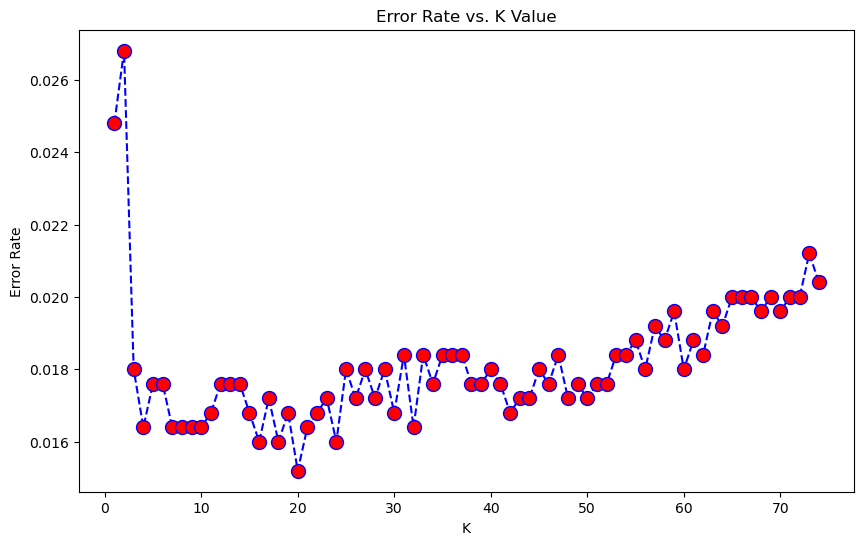

In [33]:
# Error rate calculation lower k has higher error rate

error_rate = []
for i in range(1,75):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

plt.figure(figsize=(10,6))
plt.plot(range(1,75),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Maximum accuracy:- 0.9848 at K = 19


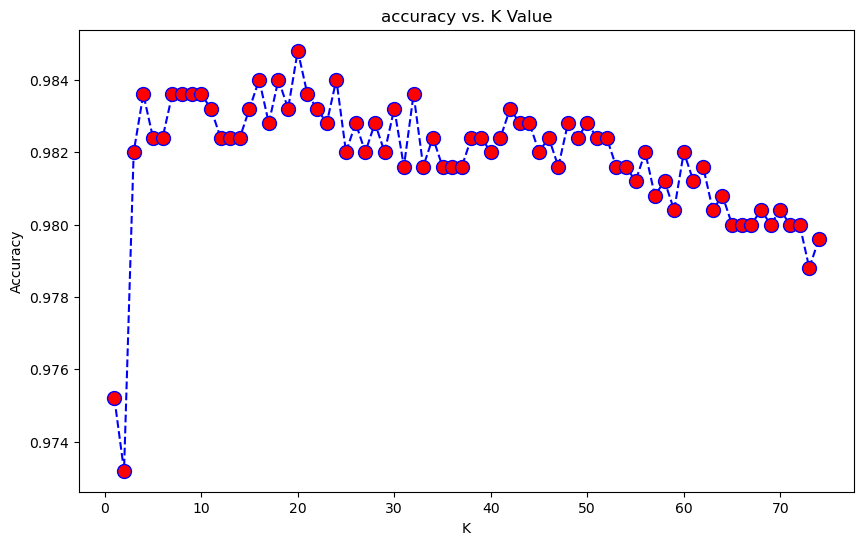

In [34]:
# Create a graph of k neighbors and accuracy

acc = []

from sklearn import metrics
for i in range(1,75):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,75),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [35]:
# Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(5, 75, 5), 
               'metric':('manhattan','euclidean','minkowski'),
               'weights':('uniform','distance')}


grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 1,n_jobs=1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 84 candidates, totalling 420 fits
{'metric': 'euclidean', 'n_neighbors': 45, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1583
           1       0.98      0.98      0.98       917

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



### Final Classification Model

In [36]:
# Final classification with best parameters
knn = KNeighborsClassifier(metric='euclidean', n_neighbors =45, weights = 'distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn)

KNeighborsClassifier(metric='euclidean', n_neighbors=45, weights='distance')


In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)
print('AUC: ',auc)

[[1561   22]
 [  20  897]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1583
           1       0.98      0.98      0.98       917

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500

AUC:  0.9821460432581455


In [38]:
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# # Accuracy is the proportion of the correct predictions
accuracy = (TN + TP)/(TN + TP +FN + FP)
print('Accuracy score is: ',accuracy)

# # Precision measures the accuracy of a positive outcome
precision = TP/(TP + FP)
print('Precision score is: ',precision)

# # Recall or Sensitiviy measures model's strength to predict positive outcome 
recall = TP/(TP + FN)
print('Recall score is: ',recall)

## Specificity measures a mode's ability to predict a negative outcome
specificity = TN/(TN + FP)
print('Specificity score is: ', specificity)


Accuracy score is:  0.9832
Precision score is:  0.9760609357997824
Recall score is:  0.9781897491821155
Specificity score is:  0.9861023373341756


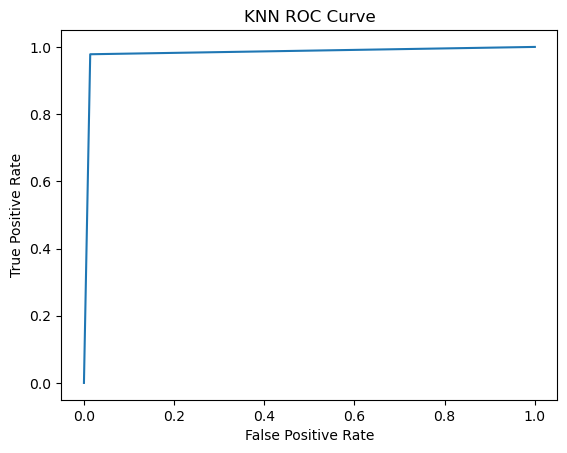

In [39]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred) # from model3.predict(x)
# roc_df = pd.DataFrame({'recall':false_positive_rate, 'specificity':true_positive_rate})
plt.plot(false_positive_rate, true_positive_rate, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve');

In [40]:
# AUC perfect classfier will have an AUC of 1, a random classifier will have an AUC of 0.5.

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print('AUC: ',auc)

AUC:  0.9821460432581455
